<a href="https://colab.research.google.com/github/rkakarla4-creator/se-tasks/blob/main/WATER_FALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter values for 7 days:

Day 1 - Enter current temperature (°C): 45
Day 1 - Enter humidity (%): 28
Day 1 - Enter wind speed (m/s): 50
Day 1 - Enter actual observed temperature (°C): 69
Day 1 → Predicted: 40.31 °C | Actual: 69.00 °C

Day 2 - Enter current temperature (°C): 36
Day 2 - Enter humidity (%): 22
Day 2 - Enter wind speed (m/s): 45
Day 2 - Enter actual observed temperature (°C): 68
Day 2 → Predicted: 28.90 °C | Actual: 68.00 °C

Day 3 - Enter current temperature (°C): 60
Day 3 - Enter humidity (%): 57
Day 3 - Enter wind speed (m/s): 80
Day 3 - Enter actual observed temperature (°C): 80
Day 3 → Predicted: 61.14 °C | Actual: 80.00 °C

Day 4 - Enter current temperature (°C): 23
Day 4 - Enter humidity (%): 22
Day 4 - Enter wind speed (m/s): 34
Day 4 - Enter actual observed temperature (°C): 53
Day 4 → Predicted: 15.83 °C | Actual: 53.00 °C

Day 5 - Enter current temperature (°C): 33
Day 5 - Enter humidity (%): 48
Day 5 - Enter wind speed (m/s): 56
Day 5 - Enter actual observed tem

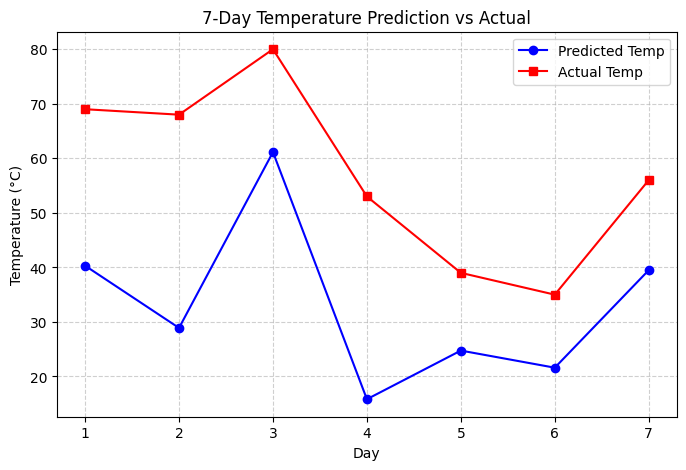

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic temperature predictor
def predict_temperature(T_current, H, W, a, b, c, d, e):
    """
    Predict temperature using quadratic model:
    T_predicted = a*T_current^2 + b*T_current + c*H + d*W + e
    """
    return a * (T_current ** 2) + b * T_current + c * H + d * W + e


# Example usage
if __name__ == "__main__":
    # Coefficients (can be tuned or learned)
    a, b, c, d, e = 0.01, 0.5, 0.02, -0.1, 2.0

    days = 7
    predictions = []
    actuals = []

    print("Enter values for 7 days:\n")
    for day in range(1, days+1):
        T_current = float(input(f"Day {day} - Enter current temperature (°C): "))
        H = float(input(f"Day {day} - Enter humidity (%): "))
        W = float(input(f"Day {day} - Enter wind speed (m/s): "))
        T_actual = float(input(f"Day {day} - Enter actual observed temperature (°C): "))

        # Predict
        T_pred = predict_temperature(T_current, H, W, a, b, c, d, e)
        predictions.append(T_pred)
        actuals.append(T_actual)

        print(f"Day {day} → Predicted: {T_pred:.2f} °C | Actual: {T_actual:.2f} °C\n")

    # -------------------------------
    # Graph for 7 days
    # -------------------------------
    days_range = np.arange(1, days+1)

    plt.figure(figsize=(8, 5))
    plt.plot(days_range, predictions, marker="o", color="blue", label="Predicted Temp")
    plt.plot(days_range, actuals, marker="s", color="red", label="Actual Temp")
    plt.xlabel("Day")
    plt.ylabel("Temperature (°C)")
    plt.title("7-Day Temperature Prediction vs Actual")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

Learned coefficients: 0.0036523294129838005 0.6108981806606646 0.01224352527640249 0.1013591341381002 8.518848313868434
Mean Squared Error: 0.013


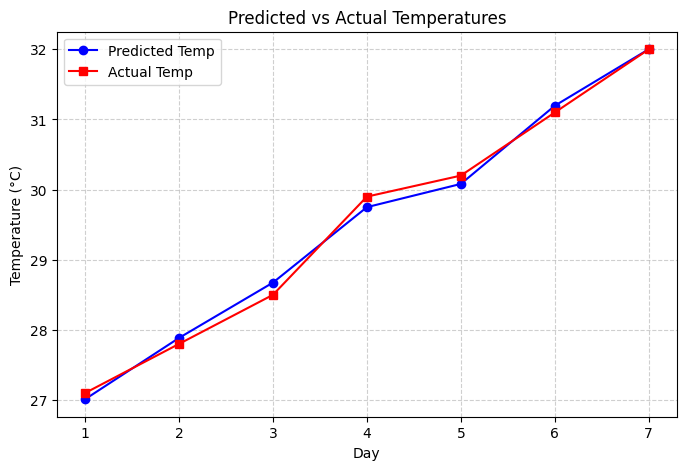

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Quadratic temperature predictor
def predict_temperature(T_current, H, W, a, b, c, d, e):
    return a * (T_current ** 2) + b * T_current + c * H + d * W + e

if __name__ == "__main__":
    # Load data from CSV
    df = pd.read_csv("weather_data.csv")

    T = df["T_current"].values
    H = df["H"].values
    W = df["W"].values
    y = df["T_actual"].values   # observed temps

    # Build design matrix X: [T^2, T, H, W, 1]
    X = np.column_stack([T**2, T, H, W, np.ones_like(T)])

    # Solve least squares: y ≈ Xβ
    coeffs, *_ = np.linalg.lstsq(X, y, rcond=None)
    a, b, c, d, e = coeffs
    print("Learned coefficients:", a, b, c, d, e)

    # Predictions
    predictions = predict_temperature(T, H, W, a, b, c, d, e)

    # Evaluation
    mse = np.mean((y - predictions) ** 2)
    print(f"Mean Squared Error: {mse:.3f}")

    # -------------------------------
    # Graph: Predicted vs Actual
    # -------------------------------
    days_range = np.arange(1, len(T) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(days_range, predictions, marker="o", color="blue", label="Predicted Temp")
    plt.plot(days_range, y, marker="s", color="red", label="Actual Temp")
    plt.xlabel("Day")
    plt.ylabel("Temperature (°C)")
    plt.title("Predicted vs Actual Temperatures")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()


✅ Learned coefficients: 0.0036523294129838005 0.6108981806606646 0.01224352527640249 0.1013591341381002 8.518848313868434

📊 Error Metrics:
 - Mean Squared Error (MSE): 0.013
 - Root Mean Squared Error (RMSE): 0.114
 - Mean Absolute Error (MAE): 0.102

💾 Results saved to results.csv


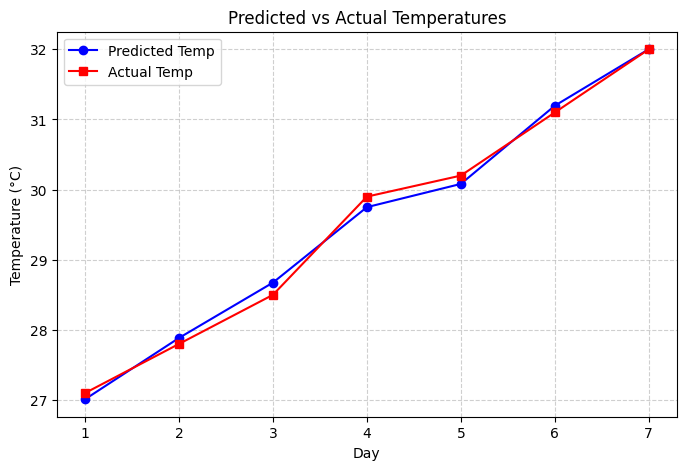

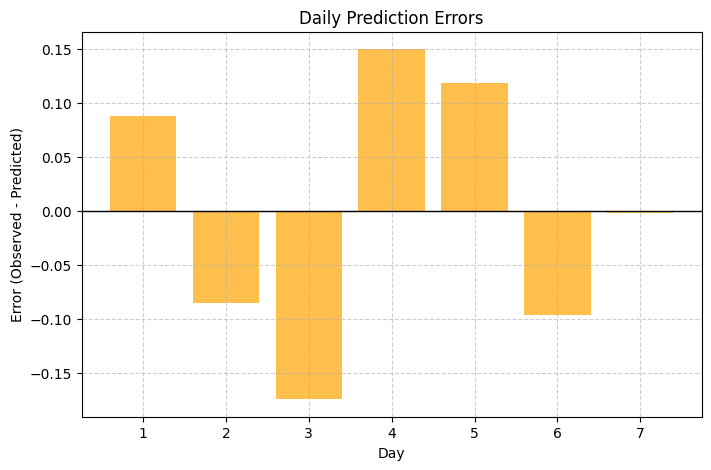

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Quadratic temperature predictor
def predict_temperature(T_current, H, W, a, b, c, d, e):
    return a * (T_current ** 2) + b * T_current + c * H + d * W + e

if __name__ == "__main__":
    # -------------------------------
    # Step 1: Load dataset from CSV
    # -------------------------------
    # CSV format: T_current,H,W,T_actual
    df = pd.read_csv("weather_data.csv")

    T = df["T_current"].values
    H = df["H"].values
    W = df["W"].values
    y = df["T_actual"].values   # observed temps

    # -------------------------------
    # Step 2: Train coefficients using regression
    # -------------------------------
    X = np.column_stack([T**2, T, H, W, np.ones_like(T)])
    coeffs, *_ = np.linalg.lstsq(X, y, rcond=None)
    a, b, c, d, e = coeffs
    print("✅ Learned coefficients:", a, b, c, d, e)

    # -------------------------------
    # Step 3: Predictions
    # -------------------------------
    predictions = predict_temperature(T, H, W, a, b, c, d, e)

    # -------------------------------
    # Step 4: Error metrics
    # -------------------------------
    mse = np.mean((y - predictions) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y - predictions))

    print(f"\n📊 Error Metrics:")
    print(f" - Mean Squared Error (MSE): {mse:.3f}")
    print(f" - Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f" - Mean Absolute Error (MAE): {mae:.3f}")

    # -------------------------------
    # Step 5: Save results to CSV
    # -------------------------------
    results = pd.DataFrame({
        "T_current": T,
        "Humidity": H,
        "Wind": W,
        "Observed_Temp": y,
        "Predicted_Temp": predictions,
        "Error": y - predictions
    })
    results.to_csv("results.csv", index=False)
    print("\n💾 Results saved to results.csv")

    # -------------------------------
    # Step 6: Graphs
    # -------------------------------
    days_range = np.arange(1, len(T) + 1)

    # Graph 1: Predicted vs Actual
    plt.figure(figsize=(8, 5))
    plt.plot(days_range, predictions, marker="o", color="blue", label="Predicted Temp")
    plt.plot(days_range, y, marker="s", color="red", label="Actual Temp")
    plt.xlabel("Day")
    plt.ylabel("Temperature (°C)")
    plt.title("Predicted vs Actual Temperatures")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

    # Graph 2: Daily Errors
    errors = y - predictions
    plt.figure(figsize=(8, 5))
    plt.bar(days_range, errors, color="orange", alpha=0.7)
    plt.axhline(0, color="black", linewidth=1)
    plt.xlabel("Day")
    plt.ylabel("Error (Observed - Predicted)")
    plt.title("Daily Prediction Errors")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()
